In [ ]:
import numpy as np  # Importing NumPy library
import pandas as pd  # Importing Pandas library
import matplotlib.pyplot as plt  # Importing Matplotlib library's "pyplot" module
import seaborn as sns  # Imorting Seaborn library

import os

In [ ]:
data = pd.read_csv("telemonitoring_parkinsons_updrs.data.csv")

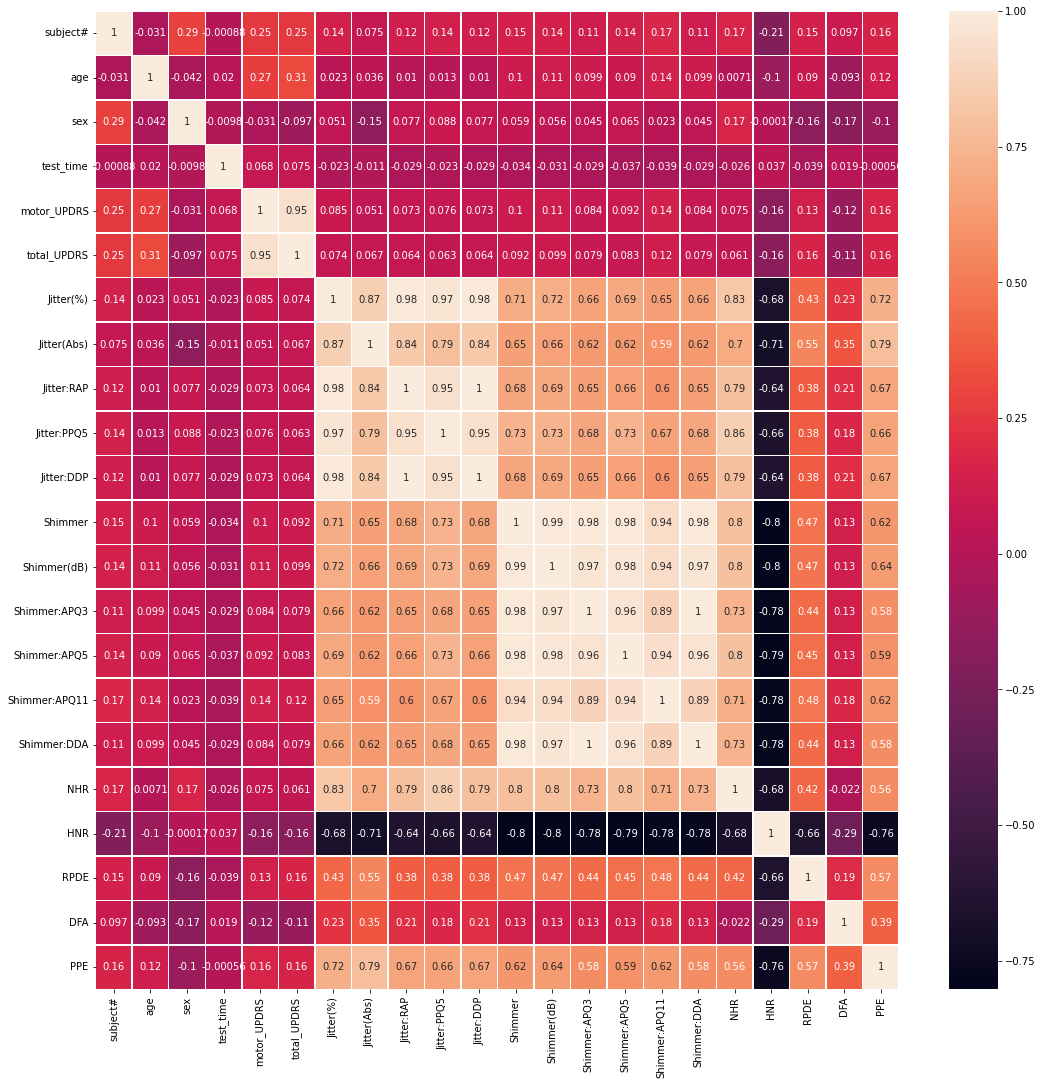

In [ ]:
fig, axes = plt.subplots(figsize=(18, 18)) 
sns.heatmap(data=data.corr(), annot=True, linewidths=.5, ax=axes) 
plt.show()

In [ ]:
data.drop(["test_time"], axis=1, inplace=True)

In [ ]:
X = data.drop(["total_UPDRS"], axis=1) 
y = data.total_UPDRS.values

In [ ]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

GB_reg_model = GradientBoostingRegressor()
GB_reg_model.fit(x_train, y_train)


GradientBoostingRegressor()

In [ ]:
from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation

y_predicted_train = GB_reg_model.predict(x_train)
y_predicted_test = GB_reg_model.predict(x_test)

accuracy_train = r2_score(y_train, y_predicted_train)
print("Training Accuracy for Multiple Linear Regression Model: ", accuracy_train)

accuracy_test = r2_score(y_test, y_predicted_test)
print("Testing Accuracy for Multiple Linear Regression Model: ", accuracy_test)

RMSE_MLR_train = sqrt(mean_squared_error(y_train, y_predicted_train))
print("RMSE for Training Data: ", RMSE_MLR_train)

RMSE_MLR_test = sqrt(mean_squared_error(y_test, y_predicted_test))
print("RMSE for Testing Data: ", RMSE_MLR_test)

Training Accuracy for Multiple Linear Regression Model:  0.9874121904635486
Testing Accuracy for Multiple Linear Regression Model:  0.9857414226848946
RMSE for Training Data:  1.205126521071035
RMSE for Testing Data:  1.2569949664630835
